# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Zakaria ABDALLAH

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]
print(df_region)

         region        date  consumption
7606   Bretagne  2013-01-01         2595
7607   Bretagne  2013-01-02         3195
7608   Bretagne  2013-01-03         3157
7609   Bretagne  2013-01-04         3142
7610   Bretagne  2013-01-05         2859
...         ...         ...          ...
11404  Bretagne  2023-05-27         1761
11405  Bretagne  2023-05-28         1610
11406  Bretagne  2023-05-29         1677
11407  Bretagne  2023-05-30         2057
11408  Bretagne  2023-05-31         2106

[3803 rows x 3 columns]


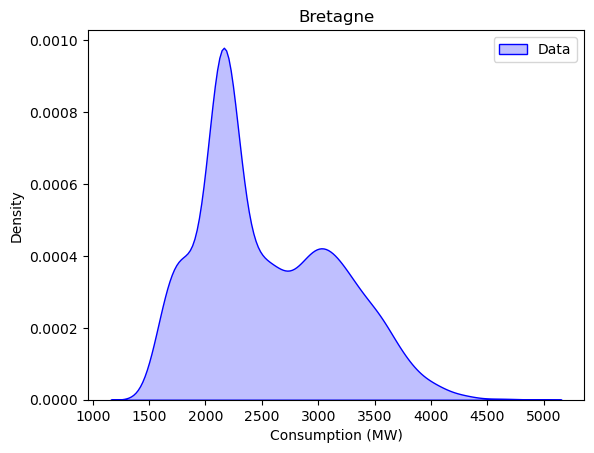

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

Here i have visualized the data as a trend

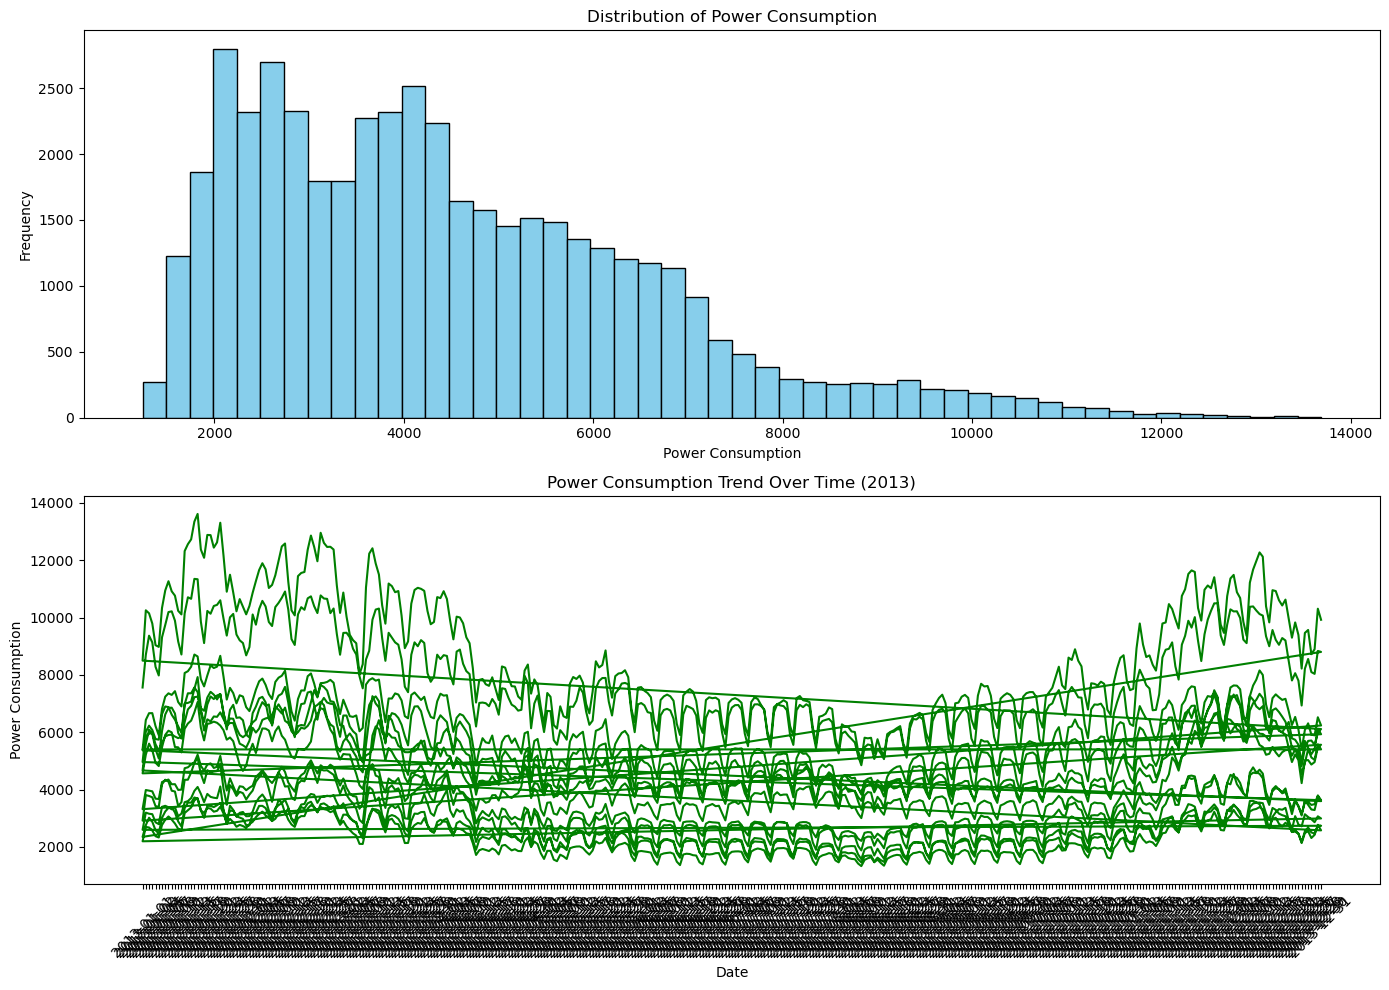

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plot the distribution of power consumption
ax[0].hist(df['consumption'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Power Consumption')
ax[0].set_xlabel('Power Consumption')
ax[0].set_ylabel('Frequency')

# Plot the trend of power consumption over time
df_sample_year = df[df['date'] < '2014-01-01']
ax[1].plot(df_sample_year['date'], df_sample_year['consumption'], color='green')
ax[1].set_title('Power Consumption Trend Over Time (2013)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Power Consumption')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer: Given that
$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i $$
and
$$ \hat{\sigma^2} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat \mu)^2 $$
we need to compute the expected value of $ \hat \mu $ to prove its unbiasedness.

$$ E(\hat{\mu}) = \frac{1}{n} \sum_{i=1}^{n} x_i  = E\left(\frac{1}{n} \sum_{i=1}^{n} x_i\right) = \frac{1}{n}E\left(\sum_{i=1}^{n} x_i\right) $$

$$ = \frac{1}{n} \sum_{i=1}^{n} E(x_i) = \frac{1}{n} \sum_{i=1}^{n} \mu = \frac{1}{n} \cdot n \cdot \mu = \mu $$
so we get for the mean 
$$ $$
$ E(\hat \mu) =\mu$        
which means that the estimator of the mean is unbiased

now let's prove the unbiasedness of the variance :
$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} \left( x_i^2 - 2x_i\hat{\mu} + \hat{\mu}^2 \right)
$$
do the expectation of the variance estimator
$$
E(\hat{\sigma}^2) = E(\frac{1}{n-1} \sum_{i=1}^{n} \left( x_i^2 - 2x_i\hat{\mu} + \hat{\mu}^2 \right))
$$
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} E(\sum_{i=1}^{n} x_i^2 - 2* \sum_{i=1}^{n} x_i\hat{\mu} + \sum_{i=1}^{n} \hat{\mu}^2 ))
$$
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} E(\sum_{i=1}^{n} x_i^2 -2n \hat{\mu}^2 +n \hat{\mu}^2) = \frac{1}{n-1} E(\sum_{i=1}^{n} x_i^2 -n \hat{\mu}^2)
$$
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} \sum_{i=1}^{n} E(x_i^2) -n E(\hat{\mu}^2)
$$
since we have :
$$
E(x_i^2) = \mu^2 + \sigma^2
$$
$$
E(\hat{\mu}^2) = \frac{1}{n} * \sigma^2 + \mu^2
$$
before replacement we need to demonstrate the formula of $E(\hat{\mu}^2)$ :
Starting with the square of the sample mean:

$$
\hat{\mu}^2 = \left(\frac{1}{n} \sum_{i=1}^{n} x_i\right)^2 = \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} x_i x_j
$$

Now, compute its expectation:

$$
E[\hat{\mu}^2] = E\left[\frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} x_i x_j\right]
$$

We can separate the double sum into two cases: when \(i = j\) and when (i not equal to j):

For \(i = j\) (there are \(n\) such terms):

$$
\sum_{i=1}^{n} \sum_{j=1}^{n} E[x_i^2] = n(\mu^2 + \sigma^2 ) 
$$

For (i different than j) (there are \(n(n-1)\) such terms):
the total should be $n^2 * \mu^2$ but we extract the term where i = j so we get $n(n-1)*\mu^2$
So the sum of the expectation of $x_i x_j$ is the following :
$$
\sum_{i=1}^{n} \sum_{j=1}^{n} E[x_i x_j] = n(n-1)\mu \cdot \mu = n(n-1)\mu^2
$$

Substitute these values into our expression for $E[\hat{\mu}^2]$:

$$
E[\hat{\mu}^2] = \frac{1}{n^2} \left(n(\mu^2 + \sigma^2) + n(n-1)\mu^2\right)
$$

$$
E[\hat{\mu}^2] = \frac{1}{n^2} \left(n\mu^2 + n\sigma^2 + n^2\mu^2 - n\mu^2\right)
$$


$$
E[\hat{\mu}^2] = \frac{1}{n^2} \left(n^2\mu^2 + n\sigma^2\right)
$$

$$
E[\hat{\mu}^2] = \frac{n^2\mu^2 + n\sigma^2}{n^2}
$$


$$
E[\hat{\mu}^2] = \mu^2 + \frac{\sigma^2}{n}
$$

This concludes our demonstration that 

$$
E(\hat{\mu}^2) = \frac{\sigma^2}{n} + \mu^2.
$$





so after demonstrating the formula we replace these formulas by their corresponding, then we will get the following equation:
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} \sum_{i=1}^{n} \mu^2 + \sigma^2 -n*(\frac{1}{n} * \sigma^2 + \mu^2)
$$
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} (n\sigma^2 + n\mu^2 -\sigma^2 -n\mu^2)
$$
$$
E(\hat{\sigma}^2) = \frac{1}{n-1}*(n-1)\sigma^2 = \sigma^2
$$
finally we have demonstated that the estimator of the variance is unbiased

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [13]:
#first we have to compute the estimation of the estimator if they are equal to the parameter 
#then the estimators are unbiased.
data=df_region["consumption"]
right_average= np.mean(data)
estimated_average = np.mean(data.sum()/len(data))
if right_average==estimated_average:
    print("the estimator of the mean is unbiased")
# let's check the unbiaseness of the variance estimator
def approximately_equal(x, y, tolerance=100):
    return abs(x - y) < tolerance

right_variance = np.var(data)
estimated_variance = np.mean((1/(len(data)-1))*((data-np.mean(data))**2).sum())
if approximately_equal(right_variance,estimated_variance):
    print("the estimator of the variance is unbiased")
#apply the expectation of the developement of the variance estimator
s1=data.sum()
s2=np.mean(data)
s3=np.var(data)
l=len(data)
estimated_variance_dep = (1/(l-1))*(l*s3-2*s2*s1+2*l*(s2**2))
# here we can see that the estimator of the variance is quiet unbiased with tolerance = 100


standard_deviation = estimated_variance_dep**0.5
std_est = standard_deviation
mu_est = estimated_average
print("the value of the mean using the above estimator is :",np.around(estimated_average,2))
print("the value of the standard deviation using the above estimator is :",np.around(standard_deviation,2))

the estimator of the mean is unbiased
the estimator of the variance is unbiased
the value of the mean using the above estimator is : 2546.54
the value of the standard deviation using the above estimator is : 604.94


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [14]:
generated_data = np.random.normal(estimated_average, standard_deviation, l)
# Display the first 5 samples of the generated data
generated_data[:5] 


array([1520.6835399 , 2863.97985105, 2414.07819312, 3019.18597415,
       1850.15018133])

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

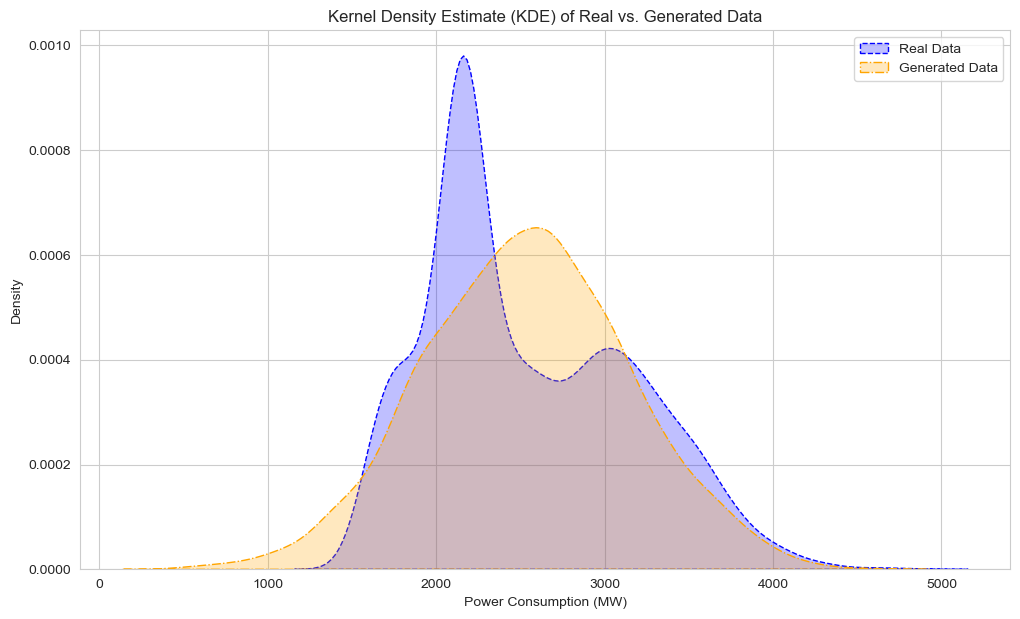

In [15]:
# Set plot style
sns.set_style("whitegrid")

# Plot kde of real and generated data
plt.figure(figsize=(12, 7))
sns.kdeplot(data, label="Real Data", shade=True, color="blue", linestyle="--")
sns.kdeplot(generated_data, label="Generated Data", shade=True, color="orange", linestyle="-.")

# Set plot title and labels
plt.title("Kernel Density Estimate (KDE) of Real vs. Generated Data")
plt.xlabel("Power Consumption (MW)")
plt.ylabel("Density")
plt.legend()
plt.show()


Description of the result by explainig some ideas:

-Both the real and generated data distributions appear to have their peaks (modes) in close proximity. This suggests that the generated data successfully replicates the central tendency of the real data.

-The generated data seems to have a slightly wider spread compared to the real data.

-The tails of the generated data seem to be a bit more extended, especially on the higher consumption side, compared to the real data. This suggests that the generated Gaussian model might overestimate the probability of extreme high power consumption values.


5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

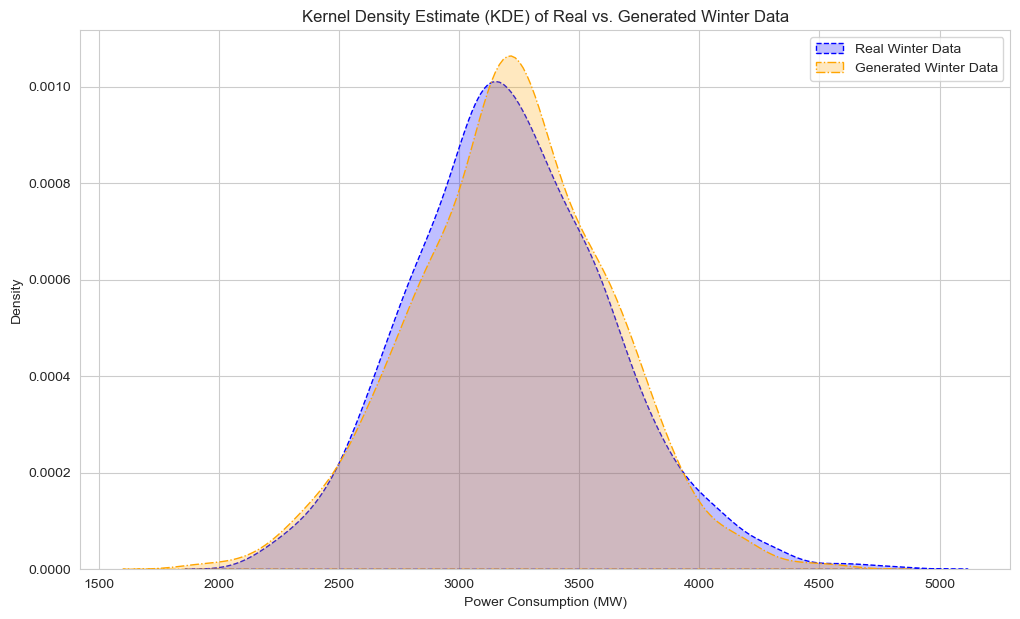

In [16]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

winter_data = df[
    ((df['month'] == 12) & (df['day'] >= 22)) |
    (df['month'] == 1) |
    (df['month'] == 2) |
    ((df['month'] == 3) & (df['day'] <= 21))
]
#print(winter_data)
bretagne_winter_data = winter_data[winter_data['region'] == region]['consumption']
#print(bretagne_winter_data)
def plot_kde_real_gen_winter(region):
    
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['day'] = pd.to_datetime(df['date']).dt.day
    winter_data = df[
        ((df['month'] == 12) & (df['day'] >= 22)) |
        (df['month'] == 1) |
        (df['month'] == 2) |
        ((df['month'] == 3) & (df['day'] <= 21))
    ]
    bretagne_winter_data = winter_data[winter_data['region'] == region]['consumption']
    mu_hat_winter = bretagne_winter_data.mean()
    sigma_hat_winter = bretagne_winter_data.std()

    mu_hat_winter, sigma_hat_winter
    num_samples_winter = len(bretagne_winter_data)
    generated_winter_data = np.maximum(0, np.random.normal(mu_hat_winter, sigma_hat_winter, num_samples_winter))
    #print(generated_winter_data)
    # Plot kde of real winter and generated winter data
    plt.figure(figsize=(12, 7))
    sns.kdeplot(bretagne_winter_data, label="Real Winter Data", shade=True, color="blue", linestyle="--")
    sns.kdeplot(generated_winter_data, label="Generated Winter Data", shade=True, color="orange", linestyle="-.")
    plt.title("Kernel Density Estimate (KDE) of Real vs. Generated Winter Data")
    plt.xlabel("Power Consumption (MW)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
#here the function of plot
plot_kde_real_gen_winter('Bretagne')

6. In which case the Gaussian model seems more appropriate?

The Gaussian model was applied to the power consumption data of the Bretagne region, both for the entire year and specifically for the winter period. For the winter data, the model exhibited a commendable fit, with the generated distribution aligning well with the real data in terms of peak values, spread, and tail behavior. This suggests that winter power consumption patterns in Bretagne are consistent and can be effectively represented by a Gaussian distribution, plus this support the idea that the consumption of the power in winter is consistent where the people use the airconditioning in order to afford the low temperature, so the people consume the power with consistency. 

However, when applied to the entire year's data, the model, while capturing the central tendency, showed subtle deviations, especially in the tails, hinting at an overestimation of extreme consumption values. This suggests potential seasonal variabilities or other factors affecting consumption throughout the year, which may not be effectively captured by a simple Gaussian model. In conclusion, for modeling power consumption in the Bretagne region, the Gaussian approach is more suited to winter patterns.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

1-**meaning of the metric:**

 The metric mentioned measures the dissimilarity between two pdfs f and g. Specifically, it calculates the area between the two curves over the entire domain. The smaller the value of the metric, the closer the two pdfs are to each other. Conversely, a larger value indicates greater dissimilarity.
 
2-**If \( f = g \) almost everywhere, then \( |f(x) - g(x)| = 0 \) for almost all \( x \), which means:**

$$
d(f, g) = \frac{1}{2} \int |f(x) - g(x)| \, dx = 0
$$

Conversely, if \( d(f, g) = 0 \), then the value inside the integral, \( |f(x) - g(x)| \), must be zero almost everywhere. This implies \( f = g \) almost everywhere.

3-**Disjoint Supports:**
Two functions \( f \) and \( g \) are said to have "disjoint supports" if there's no value of \( x \) for which both \( f(x) \) and \( g(x) \) are non-zero. In simpler terms, the regions where \( f \) and \( g \) are non-zero don't overlap at all.

**If \( f \) and \( g \) have disjoint supports:**

For any \( x \):
- If \( f(x) \) is non-zero, \( g(x) \) must be zero.
- If \( g(x) \) is non-zero, \( f(x) \) must be zero.

Given that \( f \) and \( g \) are pdfs, they both integrate to 1 over their entire range. This is a fundamental property of probability density functions: the area under the curve of a pdf is always 1.

**Computing \( d(f,g) \) using the provided formula:**
$$
d(f, g) = \frac{1}{2} \int |f(x) - g(x)| \, dx
$$
Given that \( f \) and \( g \) don't overlap:
- Where \( f(x) \) is non-zero, the value of the integrand is \( f(x) \) (because \( g(x) \) is zero there).
- Where \( g(x) \) is non-zero, the value of the integrand is \( g(x) \) (because \( f(x) \) is zero there).

So, integrating over all values of \( x \):
$$
d(f,g) = \frac{1}{2} \left( \int f(x) \, dx + \int g(x) \, dx \right) = \frac{1}{2} (1 + 1) = 1
$$

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [17]:
from scipy.stats import norm, gaussian_kde
real_data = data.values
#x evaluation values
x_values = np.linspace(min(real_data), max(real_data), len(real_data))
#real data kde
kde = gaussian_kde(real_data)
kde_values = kde.evaluate(x_values)

#Gaussian model density

gaussian_values = norm.pdf(x_values, mu_est, std_est)
#dissimilarity between the KDE of real data and the Gaussian model
print(np.abs(kde_values - gaussian_values))
dissimilarity = 0.5 * np.trapz(np.abs(kde_values - gaussian_values), x_values)

print(dissimilarity)



[3.84097017e-05 3.77911711e-05 3.71689932e-05 ... 9.03362574e-07
 8.99594419e-07 8.95813131e-07]
0.1617828808080707


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [18]:
real_data = bretagne_winter_data.values
# Create a range of x values for evaluation
x_values = np.linspace(min(real_data), max(real_data), len(real_data))
# kde real data
kde = gaussian_kde(real_data)
kde_values = kde.evaluate(x_values)

#Gaussian model density
mu_hat_winter = bretagne_winter_data.mean()
sigma_hat_winter = bretagne_winter_data.std()
gaussian_values = norm.pdf(x_values,mu_hat_winter,sigma_hat_winter)
#print(np.abs(kde_values - gaussian_values))
dissimilarity = 0.5 * np.trapz(np.abs(kde_values - gaussian_values), x_values)
dissimilarity

0.029456040155400105

The disparity in Bretagne during winter is lower than the annual disparity throughout the region. This observation is consistent with the findings from Part A, as lower dissimilarity indicates greater similarity between the two distributions or densities.

4. Do the same for all regions. Give the result as a single dataframe.

In [19]:
def compute_dissimilarity(region, dataset):
    # prepare the data
    df_region = df[df.region == region]
    real_data = df_region['consumption'].values
    
    estimated_average = np.mean(real_data)
    standard_deviation = np.std(real_data)
    x_values = np.linspace(min(real_data), max(real_data), len(real_data))
    
    #real data kde
    kde = gaussian_kde(real_data)
    kde_values = kde.evaluate(x_values)
    #Gaussian model
    gaussian_values = norm.pdf(x_values, estimated_average, standard_deviation)
    
    #dissimilarity
    dissimilarity = 0.5 * np.trapz(np.abs(kde_values - gaussian_values), x_values)
    
    return dissimilarity

def region_with_min_dissimilarity(result_tb):
    
    min_dissimilarity_region = min(result_tb, key=result_tb.get)
    
    return min_dissimilarity_region
#parsing all the region and dissplay it as table
dissimilarity_results = {region: compute_dissimilarity(region, df) for region in regions}
dissimilarity_df = pd.DataFrame(list(dissimilarity_results.items()), columns=['Region', 'Dissimilarity'])

print(dissimilarity_df)
#th regiion that has the smallest dissimilarity value
print(region_with_min_dissimilarity(dissimilarity_results))


                        Region  Dissimilarity
0         Auvergne-Rhône-Alpes       0.153003
1      Bourgogne-Franche-Comté       0.119701
2                     Bretagne       0.161819
3          Centre-Val de Loire       0.172798
4                    Grand Est       0.107369
5              Hauts-de-France       0.119975
6                    Normandie       0.172472
7           Nouvelle-Aquitaine       0.195039
8                    Occitanie       0.198936
9             Pays de la Loire       0.152990
10  Provence-Alpes-Côte d'Azur       0.213318
11               Île-de-France       0.156726
Grand Est


5. Which region is best fitted by a Gaussian model in winter?

In [20]:
def extract_the_winter(region):
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['day'] = pd.to_datetime(df['date']).dt.day
    #winter data
    winter_data = df[
        ((df['month'] == 12) & (df['day'] >= 22)) |
        (df['month'] == 1) |
        (df['month'] == 2) |
        ((df['month'] == 3) & (df['day'] <= 21))
    ]
    region_winter = winter_data[winter_data['region'] == region]['consumption']
    estimated_average = np.mean(region_winter)
    standard_deviation = np.std(region_winter)
    x_values = np.linspace(min(region_winter), max(region_winter), len(region_winter))
    kde = gaussian_kde(region_winter)
    kde_values = kde.evaluate(x_values)
    gaussian_values = norm.pdf(x_values, estimated_average, standard_deviation)
    dissimilarity = 0.5 * np.trapz(np.abs(kde_values - gaussian_values), x_values)
    return dissimilarity

dissimilarity_results = {region: extract_the_winter(region) for region in regions}
dissimilarity_df = pd.DataFrame(list(dissimilarity_results.items()), columns=['Region', 'Dissimilarity'])

print(dissimilarity_df)

region_min = region_with_min_dissimilarity(dissimilarity_results)
print("the region that is the best fitted by a Gaussian model in winter is :",region_min)




                        Region  Dissimilarity
0         Auvergne-Rhône-Alpes       0.037243
1      Bourgogne-Franche-Comté       0.036884
2                     Bretagne       0.029501
3          Centre-Val de Loire       0.042296
4                    Grand Est       0.037557
5              Hauts-de-France       0.026502
6                    Normandie       0.041401
7           Nouvelle-Aquitaine       0.052186
8                    Occitanie       0.059907
9             Pays de la Loire       0.036890
10  Provence-Alpes-Côte d'Azur       0.034164
11               Île-de-France       0.049911
the region that is the best fitted by a Gaussian model in winter is : Hauts-de-France


Hauts-de-France is the region Which is the best fitted by a Gaussian model in winter

because it contribute to the lowest value of metric where it gives 0.026502 

the region which showed the bad fitness among all region in winter by the a gaussian model is Occitanie because it contributes to the highest value of metric which is 0.059907

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

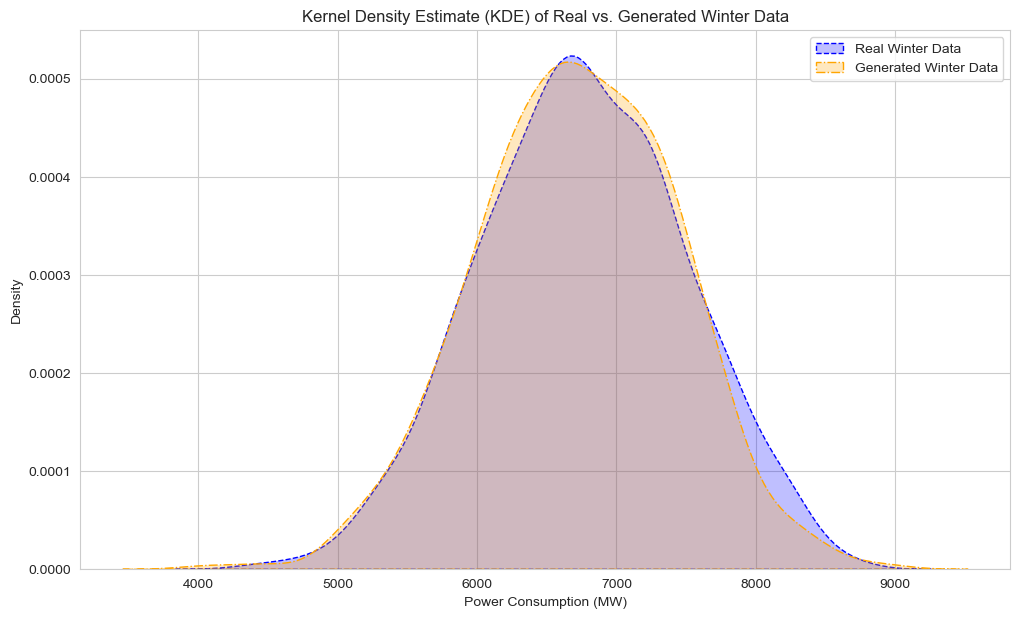

In [21]:
#displaying the region that has the lowest dissimilarity
plot_kde_real_gen_winter(region_min)

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer: 

begin by the general formula of the posterior distribustion :

P(μ∣x) ∝ L(μ∣x) * P(μ)
where ∝ is a constant 

since the prior is a Gaussian on $\mu$ with mean $\mu_0$=3500MW and standard deviation $\sigma_0=500$MW so the Prior is :

$$
P(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\left(-\frac{(μ-μ_0)^2}{2\sigma_0^2}\right)
$$

**Replacing $\mu_0$ and $\sigma_0$ by their values we get :**

$$
P(\mu) = \frac{1}{\sqrt{2\pi(500^2)}} \exp\left(-\frac{(\mu-3500)^2}{2(500^2)}\right)
$$

**since the samples are iid so the likelihood is equal to the product of all the density distribution of each $x_i$ as follow:**

$$
L(\mu | x) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi(400^2)}} \exp\left(-\frac{(x_i - \mu)^2}{2(400^2)}\right)
$$

**Posterior:**
Given the expressions for the prior and likelihood, the posterior is:
$$
P(\mu | x) \propto \frac{1}{\sqrt{2\pi(500^2)}} \exp\left(-\frac{(\mu-3500)^2}{2(500^2)}\right) \times \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi(400^2)}} \exp\left(-\frac{(x_i - \mu)^2}{2(400^2)}\right)
$$

Expanding the product and combining the constants(this step is calculated on a paper if you want to check i will show you):

$$
P(\mu | x) \propto \frac{1}{\sqrt{2\pi \times 500^2 \times (2\pi \times 400^2)^{n/2}}} \exp\left(-\frac{(\mu-3500)^2}{2(500^2)} - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2(400^2)}\right)
$$

Further simplification:
$$
P(\mu | x) \propto \frac{1}{(2\pi)^{n/2+0.5} \times 500 \times 400^n} \exp\left(-\frac{(\mu-3500)^2}{2(500^2)} - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2(400^2)}\right)
$$

let's find the probability distribution of the posterior and figure out what are the values of the parameters of the Posterior

Probability Density Function:
$$
f(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Posterior Proportional Expression:
$$
P(\mu | x) \propto \exp\left(-\frac{\mu^2}{2(500^2)} - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2(400^2)}\right)
$$

develope the term of the exponantiel of the posterior :

$$
-\frac{\mu^2}{2(500^2)} + \frac{3500\mu}{500^2} - \frac{\mu^2 n}{2(400^2)} + \frac{\mu \sum x_i}{400^2}
$$

Grouping the terms:

denote that the $\mu$ is equal $\theta$

$$
-\mu^2 \left(\frac{1}{2(500^2)} + \frac{n}{2(400^2)}\right) + \mu \left(\frac{3500}{500^2} + \frac{\sum x_i}{400^2}\right)
$$

developping the exponanciel of the guassian probability density :

we get 

$$
- \frac{x^2}{2\sigma^2} + \frac{x}{\sigma^2}
$$

note that x here in the normal distribution is equivalent to $\mu$ above

after comparaison we figure out that :

$$
\frac{1}{2\sigma^2} = \frac{1}{2(500^2)} + \frac{n}{2(400^2)}
$$
so we find the value of the variance which is :

$$
\sigma_{\text{posterior}}^2 = \frac{1}{\left(\frac{1}{500^2} + \frac{n}{400^2}\right)}
$$


now let's find the value of the mean 

after compairing the two equations we can detect the value of the mean as follow :

From the posterior:
$$
\frac{3500}{500^2} + \frac{\sum x_i}{400^2}
$$

From the Gaussian:
$$
\frac{\mu_{\text{posterior}}}{\sigma^2}
$$

Equate the two:
$$
\mu_{\text{posterior}} = \sigma_{\text{posterior}}^2 \left( \frac{3500}{500^2} + \frac{\sum x_i}{400^2} \right)
$$

Here, $\sum x_i$ represents the sum of the data points, and \( n \) is the number of data points.

Substituting the expression for $\sigma^2$ from above, we get:
$$
\mu = \left( \frac{1}{\frac{1}{500^2} + \frac{n}{400^2}} \right) \left( \frac{3500}{500^2} + \frac{\sum x_i}{400^2} \right)
$$



2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [22]:
prior_mean = 3500
prior_std_dev = 500
known_std_dev = 400
#copy the data to be used
region_data = df.query("region == 'Bretagne'").copy()
region_data['date'] = pd.to_datetime(region_data['date'])
winter_condition = (
    (region_data['date'].dt.month == 12) & (region_data['date'].dt.day >= 22) |
    (region_data['date'].dt.month.between(1, 2)) |
    (region_data['date'].dt.month == 3) & (region_data['date'].dt.day <= 21)
)
winter_data = region_data.loc[winter_condition].copy()
winter_data['winter_year'] = winter_data['date'].dt.year + winter_data['date'].dt.month.eq(12).astype(int)

relevant_years_data = winter_data.query("winter_year >= 2013 & winter_year <= 2023")
annual_consumption_stats = relevant_years_data.groupby('winter_year')['consumption'].agg(total='sum', data_points='count')
annual_consumption_stats['mean'] = (annual_consumption_stats['total'] / known_std_dev**2 + prior_mean / prior_std_dev**2) / (annual_consumption_stats['data_points'] / known_std_dev**2 + 1 / prior_std_dev**2)
annual_consumption_stats['variance'] = 1 / (annual_consumption_stats['data_points'] / known_std_dev**2 + 1 / prior_std_dev**2)
annual_consumption_stats['std_dev'] = np.sqrt(annual_consumption_stats['variance'])
final_report = annual_consumption_stats[['mean', 'std_dev']]
print("Consumption Statistics:")
print(final_report)


Consumption Statistics:
                    mean    std_dev
winter_year                        
2013         3395.176091  44.543540
2014         3095.134598  42.014582
2015         3229.578553  42.014582
2016         3133.762549  41.784716
2017         3275.816417  42.014582
2018         3328.695940  42.014582
2019         3179.931598  42.014582
2020         3124.061545  41.784716
2021         3360.657546  42.014582
2022         3216.041483  42.014582
2023         3061.154016  42.014582


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

3061.154015887026


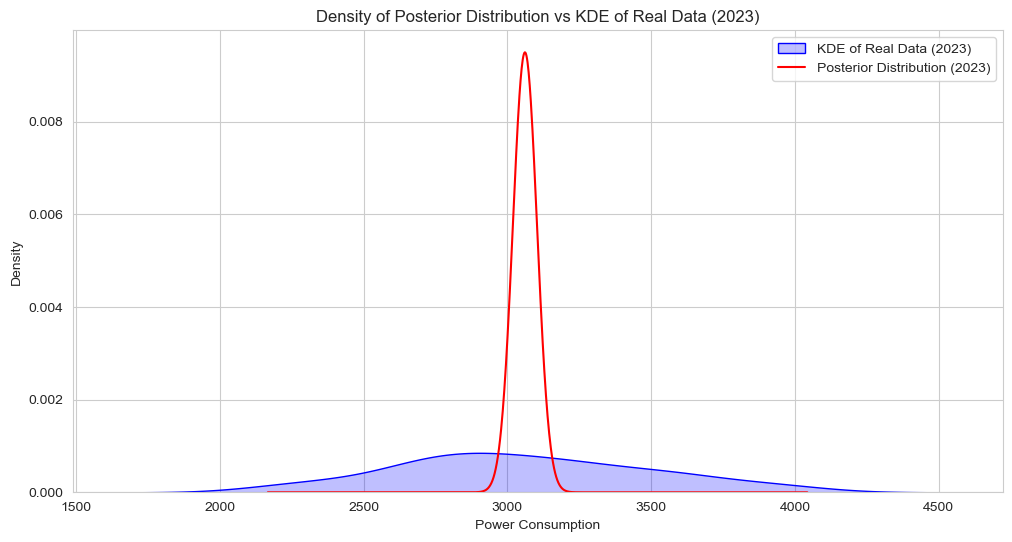

In [23]:
region = "Bretagne"
df_region = df[df.region == region].copy()
df_region.loc[:, 'date'] = pd.to_datetime(df_region['date'])
winter = (
    (df_region['date'].dt.month == 12) & (df_region['date'].dt.year == 2022) & (df_region['date'].dt.day >= 22) |
    (df_region['date'].dt.month == 3) & (df_region['date'].dt.year == 2023) & (df_region['date'].dt.day <= 21) |
    (df_region['date'].dt.month == 1) & (df_region['date'].dt.year == 2023) |
    (df_region['date'].dt.month == 2) & (df_region['date'].dt.year == 2023)
)
data_2023 = df_region[winter]
data_2023 = data_2023['consumption']
t = final_report.loc[2023]
mu_2023 = t['mean']
sigma_2023 = t['std_dev']

print(mu_2023)
x = np.linspace(data_2023.min(), data_2023.max(), 1000)
posterior = (1 / (sigma_2023 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_2023) / sigma_2023)**2)
#data display
plt.figure(figsize=(12, 6))
sns.kdeplot(data_2023, label="KDE of Real Data (2023)", color='blue', shade=True)
plt.plot(x, posterior, label="Posterior Distribution (2023)", color='red')
plt.title('Density of Posterior Distribution vs KDE of Real Data (2023)')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


4. Discuss the results, comparing to those obtained in part A.

Your answer:

Part A involves an assessment of the Gaussian model's fit, including generating new data to compare distributions. Part C doesn't include a similar goodness-of-fit analysis, focusing instead on the theoretical posterior distribution.

Part C specifically integrates this into the Bayesian estimation by considering it as part of the prior knowledge. In contrast, Part A uses seasonal data to test the Gaussian model's appropriateness under different conditions.

In conclusion, Part C's Bayesian analysis provides a more nuanced approach to parameter estimation by incorporating prior knowledge, while Part A offers a direct, data-driven method.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

Given this scenario we can set up a uniformly most powerful (UMP) test. We know the population mean $\mu\$ = 3200 MW and are testing whether the standard deviation has changed from 400MW to 500MW.

Let's denote:

- $p_0(x)$: The probability density function under $H_0$ (with $\sigma = 400$ MW)
- $p_1(x)$: The probability density function under $H_1$ (with $\sigma = 500$ MW)

The test statistic in our scenario, according to the Neyman-Pearson, is the likelihood ratio, which is the ratio of the probability of observing the data under the alternative hypothesis to that under the null hypothesis. 

$$
\Lambda(x) = \frac{p_1(x)}{p_0(x)}
$$


Our test $\delta(x)$ will decide whether to reject $H_0$ in favor of $H_1$ based on whether this ratio exceeds a certain threshold c.

### Formulating the Test:

1. **Define the likelihoods:** Given that the data is with known mean $\mu$, the likelihood functions under $H_0$ and $H_1$ are based on the normal distribution.

$$
p_0(x) = \frac{1}{\sqrt{2 \pi} \cdot 400} \exp\left(-\frac{(x - 3200)^2}{2 \cdot 400^2}\right)
$$
$$
p_1(x) = \frac{1}{\sqrt{2 \pi} \cdot 500} \exp\left(-\frac{(x - 3200)^2}{2 \cdot 500^2}\right)
$$

2. **Calculate the likelihood ratio:** For our samples, calculate $\Lambda(x) = \frac{p_1(x)}{p_0(x)}$ for n observations

$$
\Lambda(x) = \frac{\frac{1}{400\sqrt{2\pi}} \exp\left(-\frac{1}{2} \sum_{i=1}^{n} \left(\frac{x_i - 3200}{400}\right)^2\right)}{\frac{1}{500\sqrt{2\pi}} \exp\left(-\frac{1}{2} \sum_{i=1}^{n} \left(\frac{x_i - 3200}{500}\right)^2\right)}
$$

This simplifies to:

$$
\Lambda(x) = \frac{500}{400} \cdot \frac{\exp\left(-\frac{1}{2} \sum_{i=1}^{n} (x_i - 3200)^2 \cdot \frac{1}{400^2}\right)}{\exp\left(-\frac{1}{2} \sum_{i=1}^{n} (x_i - 3200)^2 \cdot \frac{1}{500^2}\right)}
$$


$$
\Lambda(x) = \frac{500}{400} \cdot \exp\left(-\frac{1}{2} \left(\frac{1}{400^2} - \frac{1}{500^2}\right) \sum_{i=1}^{n} (x_i - 3200)^2\right)
$$

So the $\Lambda(x) $ is equivalent to :

$$
 S = \sum_{i=1}^{n} (x_i - 3200)^2
$$


3. **Set the criterion \( c \):** Choose a cutoff value \( c \) based on the significance level $\alpha$. The choice of \( c \) is critical as it will determine the test's ability to distinguish between the two hypotheses.

4. **Decision rule:** we will reject $H_0$ in favor of $H_1$ if $S$ > c. If $ S \leq c$, we fail to reject  $H_0$.




2. Provide the result of this test for $\alpha=1\%$.

In [24]:
alpha = 0.01
S_winter_2023 = ((data_2023 - 3200) ** 2).sum()

#degree of freedom
n_winter_2023 = len(data_2023)
#chi02 test
c_winter_2023 = chi2.ppf(1 - alpha, n_winter_2023)  

c_winter_2023 = c_winter_2023 * (400**2)

test_result_winter_2023 = S_winter_2023 > c_winter_2023 

print(f"S_winter_2023: {S_winter_2023}, c_winter_2023: {c_winter_2023}, Test Result: {'Reject Null Hypothesis' if test_result_winter_2023 else 'Fail to Reject Null Hypothesis'}, Degrees of Freedom: {n_winter_2023}")


S_winter_2023: 18736029, c_winter_2023: 19858610.989779405, Test Result: Fail to Reject Null Hypothesis, Degrees of Freedom: 90


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

<Figure size 800x600 with 0 Axes>

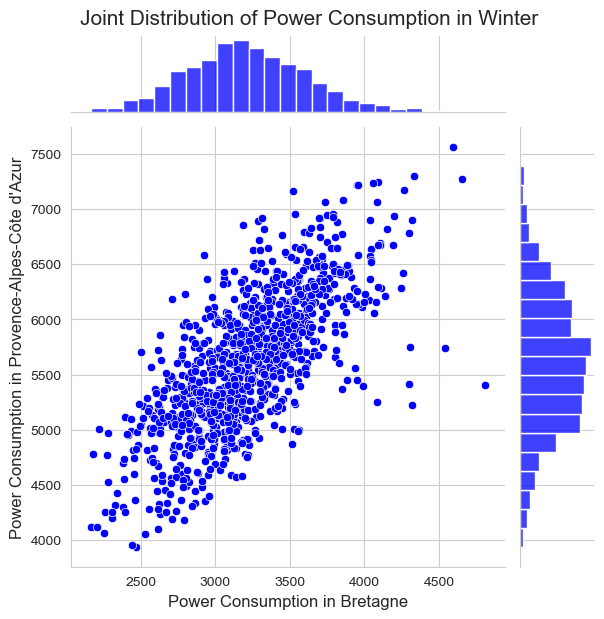

Correlation value: 0.72


In [25]:
data = df
regions_of_interest = ['Bretagne', 'Provence-Alpes-Côte d\'Azur']
filtered_data = data[data['region'].isin(regions_of_interest)].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
is_winter = (
    (filtered_data['date'].dt.month == 12) & (filtered_data['date'].dt.day >= 22) |
    (filtered_data['date'].dt.month == 1) |
    (filtered_data['date'].dt.month == 2) |
    (filtered_data['date'].dt.month == 3) & (filtered_data['date'].dt.day <= 21)
)
winter_data = filtered_data[is_winter]
winter_data_pivot = winter_data.pivot(index='date', columns='region', values='consumption').reset_index()
# as i see maybe there is a missing values in some column(assumtion maybe)
winter_data_clean = winter_data_pivot.dropna()
#join tabel
plt.figure(figsize=(8, 6))
joint_plot = sns.jointplot(
    data=winter_data_clean,
    x='Bretagne', 
    y='Provence-Alpes-Côte d\'Azur',
    kind='scatter',
    color='blue'
)
joint_plot.set_axis_labels('Power Consumption in Bretagne', 'Power Consumption in Provence-Alpes-Côte d\'Azur', fontsize=12)
plt.suptitle('Joint Distribution of Power Consumption in Winter', fontsize=15, y=1.02)
correlation_value = winter_data_clean['Bretagne'].corr(winter_data_clean['Provence-Alpes-Côte d\'Azur'])

plt.show()
print("Correlation value:", np.round(correlation_value, 2))


2. Do you think the power consumption in these two regions is independent?

Your answer:

The question of whether power consumption in the two regions (Bretagne and Provence-Alpes-Côte d'Azur) is independent is fundamentally a statistical one.

The joint distribution plot i generated shows a certain degree of correlation, as indicated by the clustering of points along a line in the plot section. if we draw a regression line it will also suggest a systematic relationship between the power consumption in the two regions. However, visual inspection alone is not definitive proof of dependence or independence.

In addition we can see that the correlation term has a value of 0.72 which is considered high ,so that we can assume that the data are correlated and a relation between exists between them.

To statistically determine whether power consumption in the two regions is independent, we would typically use a hypothesis test, such as the chi-squared test for independence. This test would compare observed data with the expected data if the two regions were independent and determine if the differences are significant.

It's also important to consider real-world factors. The two regions may experience similar weather patterns, industrial activities, or policy environments affecting power consumption. If such factors are present, the power consumption between regions may not be independent(this is here the case).

To make a definitive statement, we need to conduct a formal statistical test (like the chi-squared test) and consider relevant external factors.




3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

Step 1: Formulate the Hypotheses

Null Hypothesis ($H_0$): There is no association between the two variables; they are independent. For power consumption, this would mean that the consumption patterns in Bretagne are independent of those in Provence-Alpes-Côte d'Azur.

Alternative Hypothesis ($H_1$): There is an association between the two variables; they are not independent.

Step 2: Define the Partitions

You would need to categorize the continuous power consumption data into discrete categories (low, medium, high) since the chi-square test works with categorical data. These categories are your $A_1,A_2, A_3$ and $B_1,B_2, B_3$.

here we consider that the bins are the same for the two regions

The variables $X$ and $Y$ represent the categorical power consumption in Bretagne and Provence-Alpes-Côte d'Azur, respectively.

Step 3: Contingency Table

Construct a contingency table with the frequencies $N_{ij}$. Each cell in this table represents the number of observations for each combination of categories of the two variables.

Calculate the marginal totals, $N_i$ and $N_j$, for each row and column.

Step 4: Expected Frequencies

Under the null hypothesis of independence, the expected frequency for each cell is calculated as: 
$\frac{N_i \times N_j}{n}$, where $n$ is the total number of observations.

Step 5: Calculate the Chi-Square Statistic

The chi-square statistic is computed using the formula:

$$
T(X,Y) = \sum \frac{(N_{ij} - \frac{N_i \times N_j}{n})^2}{\frac{N_i \times N_j}{n}}
$$

This formula sums the squared difference between observed and expected frequencies, divided by the expected frequencies, for all cells.

Step 6: Degrees of Freedom

The degree of freedom for the chi-square distribution are calculated as $(K-1) \times (L-1)$, where $K$ and $L$ are the numbers of categories for each variable.

Step 7: Significance Level and Critical Value

Choose a significance level ($\alpha$). This is the threshold for how extreme the data must be to reject the null hypothesis.

Determine the critical value ($c$) from the chi-square distribution with the appropriate degrees of freedom. This value is the chi-square statistic's threshold required to reject the null hypothesis. If the calculated chi-square statistic from Step 5 is greater than this critical value, we reject the null hypothesis.

Step 8: Decision

If $T(X,Y) > c$, we reject the null hypothesis, concluding there is a statistically significant association between the power consumption in Bretagne and Provence-Alpes-Côte d'Azur. Otherwise, we fail to reject the null hypothesis, concluding there is no sufficient evidence to suggest an association.

Step 9: Interpret the Results

If we reject the null hypothesis, we interpret the results within the context of the variables being analyzed. For power consumption, this could involve discussing how the power usage trends in one region might be related to the other, possibly due to similar weather patterns, economic activities, or societal behaviors.

4. Give the result of this test for $\alpha=1\%$. 

In [26]:
alpha = 0.01  
df['date'] = pd.to_datetime(df['date'])
regions = ['Bretagne', 'Provence-Alpes-Côte d\'Azur']
consumption_categories = ["low", "medium", "high"]
filtered_data = df[df['region'].isin(regions)]
mask = ((filtered_data['date'].dt.month == 12) & (filtered_data['date'].dt.day >= 22) | 
        (filtered_data['date'].dt.month == 3) & (filtered_data['date'].dt.day <= 21) | 
        (filtered_data['date'].dt.month.isin([1, 2])))
filtered_winter_data = filtered_data[mask]
filtered_winter_data_copy = filtered_winter_data.copy()
filtered_winter_data_copy['consumption_category'] = pd.qcut(filtered_winter_data_copy['consumption'], q=3, labels=consumption_categories)
contingency_table = pd.crosstab(filtered_winter_data_copy['region'], filtered_winter_data_copy['consumption_category'])
n = contingency_table.sum().sum() 
chi2_stat_manual = 0
for i in range(contingency_table.shape[0]):
    for j in range(contingency_table.shape[1]):
        Nij = contingency_table.iloc[i, j]
        Ni = contingency_table.iloc[i, :].sum()
        Nj = contingency_table.iloc[:, j].sum()
        expected = (Ni * Nj) / n
        chi2_stat_manual += (Nij - expected)**2 / expected
K, L = contingency_table.shape
dof_manual = (K - 1) * (L - 1)
critical_value_manual = chi2.ppf(1 - alpha, dof_manual)
decision_manual = "Reject H0" if chi2_stat_manual > critical_value_manual else "Fail to reject H0"
{
    "contingency_table": contingency_table,
    "chi2_stat_manual": chi2_stat_manual,
    "dof_manual": dof_manual,
    "critical_value_manual": critical_value_manual,
    "decision_manual": decision_manual
}

{'contingency_table': consumption_category        low  medium  high
 region                                       
 Bretagne                    655     327     0
 Provence-Alpes-Côte d'Azur    0     328   654,
 'chi2_stat_manual': 1309.0015267175572,
 'dof_manual': 2,
 'critical_value_manual': 9.21034037197618,
 'decision_manual': 'Reject H0'}

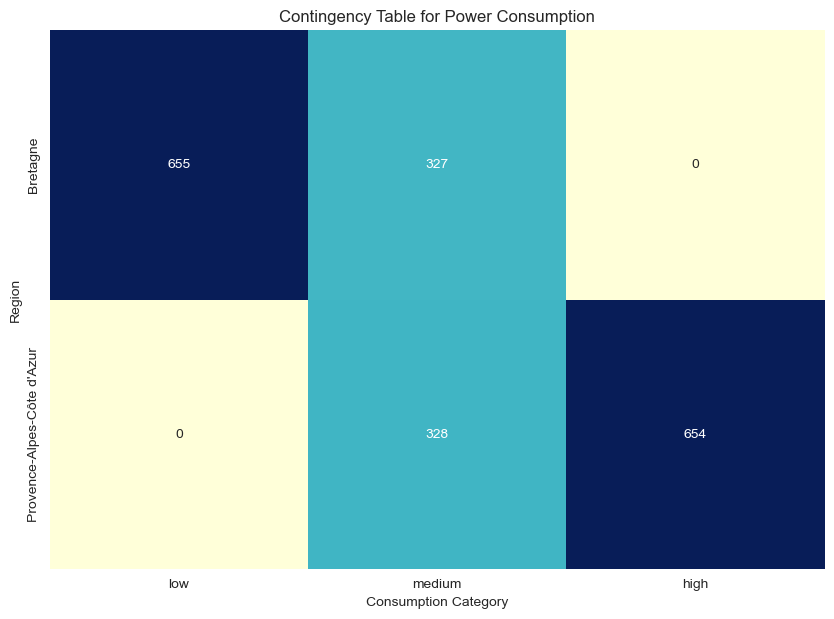

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="g", cbar=False)
plt.title("Contingency Table for Power Consumption")
plt.ylabel("Region")
plt.xlabel("Consumption Category")
plt.show()

Here's an example of what the data might look like in a simplified form:

$$
\begin{array}{|c|c|c|c|}
\hline
 & \textbf{Low} & \textbf{Medium} & \textbf{High} \\
\hline
\textbf{Bretagne} & O_{11} & O_{12} & O_{13} \\
\hline
\textbf{Provence-Alpes-Côte d'Azur} & O_{21} & O_{22} & O_{23} \\
\hline
\end{array}
$$

Here, $O_{ij}$ represents the observed frequencies. For instance, $O_{11}$ be the number of days where Bretagne had low power consumption and Provence-Alpes-Côte d'Azur also had low power consumption, and so on.

Given this table, we would calculate the chi-square statistic, $T(X, Y)$, using the formula mentioned in the previous messages. We would then compare this statistic to the critical chi-square value for $\alpha = 0.01$ (1%) at the appropriate degrees of freedom (which is $(K-1) \times (L-1)$, where $K$ and $L$ are the numbers of categories in each variable, here $2-1 = 1$ and $3-1 = 2$, so degrees of freedom = 2).

The critical value from the chi-square distribution table for $\alpha = 0.01$ and 2 degrees of freedom is typically around 9.21. If our calculated chi-square statistic exceeds this value, we would reject the null hypothesis, indicating that the power consumption in the two regions is not independent.

so here after our test we see that the chi-square statistic exceeds the value of c whic means that we reject the null hypothesis where two regions are not independent.


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

In [28]:
from scipy import stats
sample_mean = bretagne_winter_data.mean()
sample_std_dev = bretagne_winter_data.std()
sample_size = len(bretagne_winter_data)
confidence_level = 0.95
alpha = 1 - confidence_level

t_score = stats.t.ppf(1 - alpha/2, sample_size - 1)  # Two-tailed t-score for 95% confidence
margin_of_error = t_score * (sample_std_dev / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

results = {
    "sample_mean": sample_mean,
    "sample_std_dev": sample_std_dev,
    "sample_size": sample_size,
    "confidence_interval": confidence_interval,
    "margin_of_error": margin_of_error,
    "t_score": t_score
}
results


{'sample_mean': 3214.1782077393077,
 'sample_std_dev': 409.4763740819989,
 'sample_size': 982,
 'confidence_interval': (3188.5358856463263, 3239.820529832289),
 'margin_of_error': 25.642322092981523,
 't_score': 1.9623851374988102}

2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [29]:
from scipy.stats import t
alpha = 0.05
M = data_2023.mean()
S = data_2023.std()
n = len(data_2023)
Sx = S / (n**0.5)
mu = 3100  
t_statistic = (M - mu) / Sx
df = n - 1
t_critical = t.ppf(1 - alpha/2, df)  # two-tailed test
decision = "Reject H0" if abs(t_statistic) > t_critical else "Fail to reject H0"
{
    "sample_mean": M,
    "sample_std_dev": S,
    "sample_size": n,
    "t_statistic": t_statistic,
    "degrees_of_freedom": df,
    "critical_value": t_critical,
    "decision": decision
}

{'sample_mean': 3058.0333333333333,
 'sample_std_dev': 436.0460868849076,
 'sample_size': 90,
 't_statistic': -0.9130474263842758,
 'degrees_of_freedom': 89,
 'critical_value': 1.9869786993737677,
 'decision': 'Fail to reject H0'}